In the case of monoester metabolites, two PMFs were calculated, both for the neutral (protonated) and charged (deprotonated) forms, and from them the weighted average was calculated which is used in the calculations of permeability. The weighted average for $\Delta G(z)$ is given by:
$$\Delta G(z) = \Delta G(z)_P\frac{e^{\frac{-\Delta G(z)_P}{RT}}}{Q(z)} + \Delta G(z)_{PH}\frac{e^{\frac{-\Delta G(z)_{PH}}{RT}}}{Q(z)}$$
where, $Q(z)$ is the sum of two states given by, $$Q(z) = e^{\frac{-\Delta G(z)_P}{RT}} + e^{\frac{-\Delta G(z)_{PH}}{RT}}$$
Here, $\Delta G(z)_P$ is the PMF of the charged (deprotonated) phthalate and $\Delta G(z)_{PH}$ is the PMF of the uncharged (protonated) phthalate calculated for every $z$.

In [212]:
# The weighted average of the PMF is already done and is saved in xvg files with small letter names like 
# mep-meph.xvg

In [213]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapz, simps #Importing trapz, and simps module from scipy for numerical integration


In [214]:
pmf_mep_meph = pd.read_csv('mep-meph.xvg', header = None, delim_whitespace=True)

In [215]:
# Checking the few data from pmf_mep_meph # Note, there are no error bars in here
pmf_mep_meph

,0,1
0,0.005019,18.906007
1,0.015055,18.795131
2,0.025092,18.575250
3,0.035129,18.311036
4,0.045166,17.977729
...,...,...
416,4.180404,-0.506003
417,4.190441,-0.477159
418,4.200478,-0.455419
419,4.210515,-1.459127


In [216]:
# Extrapolating for the data at 0
df = pd.DataFrame({0: [0.000000], 1: 18.906007})
df = df.append(pmf_mep_meph)
df = df.reset_index(drop=True)

In [217]:
# Just making a copy to have same name as original
pmf_mep_meph = df.copy(deep=True)

In [218]:
pmf_mep_meph.head()

,0,1
0,0.000000,18.906007
1,0.005019,18.906007
2,0.015055,18.795131
3,0.025092,18.575250
4,0.035129,18.311036


In [219]:
# We don't want the values of z distance above 4, so
pmf_mep_meph = pmf_mep_meph[pmf_mep_meph[0] <= 4.000000]

In [220]:
pmf_mep_meph.tail()

,0,1
395,3.959590,0.050143
396,3.969627,0.049512
397,3.979664,0.042113
398,3.989701,0.067962
399,3.999738,0.067372


In [221]:
# Just extrapolating to have the same value in z = 4 nm as in z = 3.999738
pmf_mep_meph = pmf_mep_meph.append({0: 4.000000, 1: 0.067372}, ignore_index = True)

In [222]:
pmf_mep_meph.tail()

,0,1
396,3.969627,0.049512
397,3.979664,0.042113
398,3.989701,0.067962
399,3.999738,0.067372
400,4.000000,0.067372


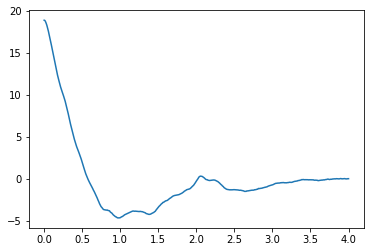

In [223]:
# Now, check a rough plot for free energy
plt.plot(pmf_mep_meph[0], pmf_mep_meph[1])

Now adding a $e^\frac{\Delta G}{RT}$ component in the last column of our PMF data. Here, $\Delta G$ is obtained from the second column pmf_mep_meph[1] and RT is 2.478 KJ/mol at 298K.

In [224]:
pmf_mep_meph[2] = np.exp(pmf_mep_meph[1]/2.478)

In [225]:
pmf_mep_meph

,0,1,2
0,0.000000,18.906007,2058.108789
1,0.005019,18.906007,2058.108789
2,0.015055,18.795131,1968.050284
3,0.025092,18.575250,1800.942423
4,0.035129,18.311036,1618.801735
...,...,...,...
396,3.969627,0.049512,1.020182
397,3.979664,0.042113,1.017140
398,3.989701,0.067962,1.027806
399,3.999738,0.067372,1.027561


In [226]:
# Just checking some values in the last column if it makes sense
np.exp(18.906007/2.478)
# So, here the last column index 2 contains the values of the numerator of our integrand that we want to integrate

2058.1087888347274

### Weighted average of Diffusion coefficient for monoethyl phthalate (MEP)

Similarly for diffusion coefficient, the weighted average for $D(z)$ is given by:
$$D(z) = D(z)_P\frac{e^{\frac{-\Delta G(z)_P}{RT}}}{Q(z)} + D(z)_{PH}\frac{e^{\frac{-\Delta G(z)_{PH}}{RT}}}{Q(z)}$$
where, $Q(z)$ is the sum of two states given by, $$Q(z) = e^{\frac{-\Delta G(z)_P}{RT}} + e^{\frac{-\Delta G(z)_{PH}}{RT}}$$
Here, $\Delta G(z)_P$ is the PMF of the charged (deprotonated) phthalate and $\Delta G(z)_{PH}$ is the PMF of the uncharged (protonated) phthalate calculated for every $z$.

So, for the weighted average of Diffusion coefficient, we need the free energy of both the charged(deprotonated(P)) and uncharged (protonated(PH)) phthalate

In [332]:
# Here, the pmf for both charged and uncharged monoester metabolites are given by the xvg files with their usual names
# Like 4-MEP.xvg, 4-MEPH.xvg

In [228]:
pmf_mep =  pd.read_csv('4-MEP.xvg', header = None, delim_whitespace=True)

In [229]:
pmf_mep.head()

,0,1
0,0.005019,42.28958
1,0.015055,42.11615
2,0.025092,41.80657
3,0.035129,41.34310
4,0.045166,40.78848


In [230]:
pmf_meph =  pd.read_csv('4-MEPH.xvg', header = None, delim_whitespace=True)

In [231]:
pmf_meph.head()

,0,1
0,0.005015,18.904136
1,0.015046,18.793218
2,0.025077,18.573274
3,0.035108,18.308913
4,0.045139,17.975430


In [232]:
pmf_mep.tail()

,0,1
416,4.180404,-0.515403
417,4.190441,-0.486536
418,4.200478,-0.466332
419,4.210515,-1.464132
420,4.220552,-2.946601


In [233]:
pmf_meph.tail()

,0,1
416,4.177891,18.331846
417,4.187922,18.368044
418,4.197953,17.953909
419,4.207984,19.170990
420,4.218015,19.257816


In [234]:
# Extrapolating for the data at 0 for both
df = pd.DataFrame({0: [0.000000], 1: 42.28958})
df = df.append(pmf_mep)
df = df.reset_index(drop=True)

In [235]:
# Just making a copy to have same name as original
pmf_mep = df.copy(deep=True)

In [236]:
pmf_mep.head()

,0,1
0,0.000000,42.28958
1,0.005019,42.28958
2,0.015055,42.11615
3,0.025092,41.80657
4,0.035129,41.34310


In [237]:
# We don't want the values of z distance above 4, so
pmf_mep = pmf_mep[pmf_mep[0] <= 4.000000]

In [238]:
pmf_mep.tail()

,0,1
395,3.959590,0.039707
396,3.969627,0.039132
397,3.979664,0.031721
398,3.989701,0.057453
399,3.999738,0.056941


In [239]:
# Just extrapolating to have the same value in z = 4 nm as in z = 3.999738
pmf_mep = pmf_mep.append({0: 4.000000, 1: 0.056941}, ignore_index = True)

In [240]:
pmf_mep

,0,1
0,0.000000,42.289580
1,0.005019,42.289580
2,0.015055,42.116150
3,0.025092,41.806570
4,0.035129,41.343100
...,...,...
396,3.969627,0.039132
397,3.979664,0.031721
398,3.989701,0.057453
399,3.999738,0.056941


In [241]:
# Similarly for meph,
# Extrapolating for the data at 0 for both
df = pd.DataFrame({0: [0.000000], 1: 18.904136})
df = df.append(pmf_meph)
df = df.reset_index(drop=True)
# Just making a copy to have same name as original
pmf_meph = df.copy(deep=True)

In [242]:
pmf_meph.head()

,0,1
0,0.000000,18.904136
1,0.005015,18.904136
2,0.015046,18.793218
3,0.025077,18.573274
4,0.035108,18.308913


In [243]:
# We don't want the values of z distance above 4, so
pmf_meph = pmf_meph[pmf_meph[0] <= 4.000000]

In [244]:
pmf_meph.tail()

,0,1
395,3.957210,18.588051
396,3.967241,18.602947
397,3.977272,18.592219
398,3.987303,18.585802
399,3.997334,18.606724


In [245]:
# Just extrapolating to have the same value in z = 4 nm as in z = 3.997334
pmf_meph = pmf_meph.append({0: 4.000000, 1: 18.606724}, ignore_index = True)

In [246]:
pmf_meph

,0,1
0,0.000000,18.904136
1,0.005015,18.904136
2,0.015046,18.793218
3,0.025077,18.573274
4,0.035108,18.308913
...,...,...
396,3.967241,18.602947
397,3.977272,18.592219
398,3.987303,18.585802
399,3.997334,18.606724


In [247]:
pmf_mep

,0,1
0,0.000000,42.289580
1,0.005019,42.289580
2,0.015055,42.116150
3,0.025092,41.806570
4,0.035129,41.343100
...,...,...
396,3.969627,0.039132
397,3.979664,0.031721
398,3.989701,0.057453
399,3.999738,0.056941


In [248]:
pmf_meph

,0,1
0,0.000000,18.904136
1,0.005015,18.904136
2,0.015046,18.793218
3,0.025077,18.573274
4,0.035108,18.308913
...,...,...
396,3.967241,18.602947
397,3.977272,18.592219
398,3.987303,18.585802
399,3.997334,18.606724


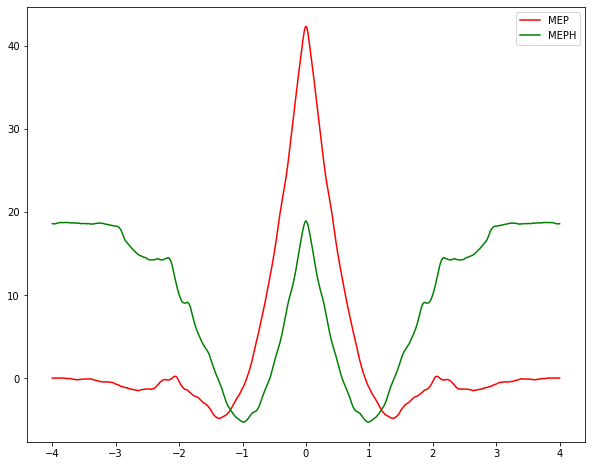

In [249]:
# Now, check a rough plot for free energy
plt.figure(figsize = (10,8))
plt.plot(pmf_mep[0], pmf_mep[1], color = 'r', label = 'MEP')
plt.plot(-pmf_mep[0], pmf_mep[1], color = 'r')
plt.plot(pmf_meph[0], pmf_meph[1], color = 'g', label = 'MEPH')
plt.plot(-pmf_meph[0], pmf_meph[1], color = 'g')
plt.legend()

In [250]:
diff_mep = pd.read_csv('MEP_dif.txt', header = None, delim_whitespace=True)
diff_meph = pd.read_csv('MEPH_dif.txt', header = None, delim_whitespace = True)

In [251]:
diff_mep.head()

,0,1
0,0.0,6.340288e-08
1,0.1,2.488933e-07
2,0.2,5.789317e-08
3,0.3,3.431468e-07
4,0.4,3.825089e-07


In [252]:
diff_meph.head()

,0,1
0,0.0,1.194355e-07
1,0.1,1.152437e-07
2,0.2,1.077775e-08
3,0.3,1.762089e-07
4,0.4,5.616299e-07


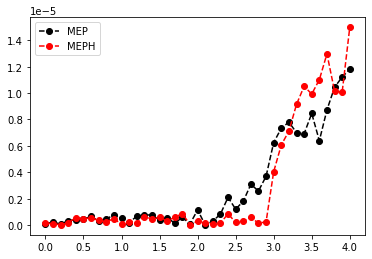

In [253]:
# Plotting both diffusion coefficients
plt.plot(diff_mep[0], diff_mep[1], '--o', color = 'k', label = 'MEP')
plt.plot(diff_meph[0], diff_meph[1], '--o', color = 'r', label = 'MEPH')
plt.legend()

Here, the linear interpolation is done for our diffusion coefficient so that we can obtain the missing values at the position specified by the PMF data. The function takes these values **np.interp(The z-coordinates at which to evaluate the interpolated values, The z-coordinates of the data points, The function values of these data points)**

In [254]:
diff_mep_inter = np.interp(pmf_mep[0], diff_mep[0], diff_mep[1])
diff_meph_inter = np.interp(pmf_mep[0], diff_meph[0], diff_meph[1])

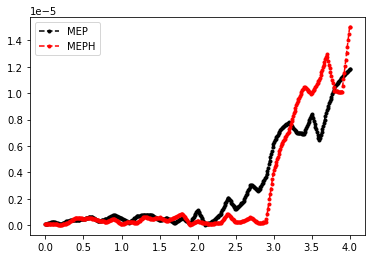

In [255]:
# Plot both to check the interpolated values if it makes sense or not
plt.plot(pmf_mep[0], diff_mep_inter, '--.', color = 'k', label = 'MEP')
plt.plot(pmf_mep[0], diff_meph_inter, '--.', color = 'r', label = 'MEPH')
plt.legend()
# It does with many data points

In [256]:
pmf_mep_meph[0].head()

0    0.000000
1    0.005019
2    0.015055
3    0.025092
4    0.035129
Name: 0, dtype: float64

In [257]:
pmf_mep[0].head()

0    0.000000
1    0.005019
2    0.015055
3    0.025092
4    0.035129
Name: 0, dtype: float64

In [258]:
pmf_meph[0].head()

0    0.000000
1    0.005015
2    0.015046
3    0.025077
4    0.035108
Name: 0, dtype: float64

So, since the z distance of pmf_meph is not same as of pme_mep, and weighted average(pme_mep_meph), we are now interpolating the value of pmf for meph at same z distance as that of mep and the weighted average. Let's make a new dataframe meph with interpolated values for pmf which we can use for our calculations.

In [259]:
meph = np.interp(pmf_mep[0], pmf_meph[0], pmf_meph[1])

In [260]:
pmf_meph[1]

0      18.904136
1      18.904136
2      18.793218
3      18.573274
4      18.308913
         ...    
396    18.602947
397    18.592219
398    18.585802
399    18.606724
400    18.606724
Name: 1, Length: 401, dtype: float64

In [261]:
pd.Series(meph)

0      18.904136
1      18.904102
2      18.793019
3      18.572876
4      18.308211
         ...    
396    18.600395
397    18.590689
398    18.590804
399    18.606724
400    18.606724
Length: 401, dtype: float64

In [262]:
# As you can see, not much of difference between the original values pmf_meph, and the interpolated ones meph
# We can make a plot for both and check if we want

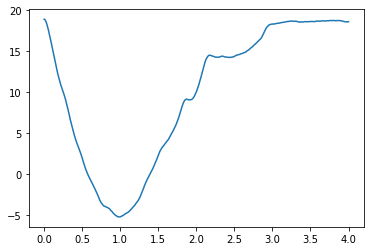

In [263]:
# original
plt.plot(pmf_mep[0], pmf_meph[1])

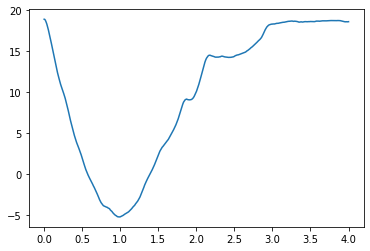

In [264]:
#Interpolated one
plt.plot(pmf_mep[0], meph)

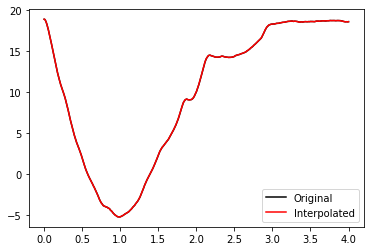

In [265]:
# Plot both
plt.plot(pmf_mep[0], pmf_meph[1], label = 'Original', color = 'k')
plt.plot(pmf_mep[0], meph, label = 'Interpolated', color = 'r')
plt.legend()
# So they coincide, not a difference at all

#### Now, for the weighted average of the diffusion coefficient, we need to make a dataframe where we make a separate columns for distance, free energy of deprotonated(P), free energy of protonated(PH), Diffusion coefficient for deprotonated, Diffusion coefficient for protonated, and finally the the partition function (Q(z)) according to the relation $$D(z) = D(z)_P\frac{e^{\frac{-\Delta G(z)_P}{RT}}}{Q(z)} + D(z)_{PH}\frac{e^{\frac{-\Delta G(z)_{PH}}{RT}}}{Q(z)}$$
where, $Q(z)$ is the sum of two states given by, $$Q(z) = e^{\frac{-\Delta G(z)_P}{RT}} + e^{\frac{-\Delta G(z)_{PH}}{RT}}$$

In [266]:
df_diffusion = pd.DataFrame({'z':pmf_mep[0], 'G_P': pmf_mep[1], 'G_PH': meph, 'D_P': diff_mep_inter, 'D_PH': diff_meph_inter}) 

In [267]:
df_diffusion

,z,G_P,G_PH,D_P,D_PH
0,0.000000,42.289580,18.904136,6.340288e-08,1.194355e-07
1,0.005019,42.289580,18.904102,7.271173e-08,1.192251e-07
2,0.015055,42.116150,18.793019,9.132937e-08,1.188044e-07
3,0.025092,41.806570,18.572876,1.099470e-07,1.183837e-07
4,0.035129,41.343100,18.308211,1.285647e-07,1.179629e-07
...,...,...,...,...,...
396,3.969627,0.039132,18.600395,1.162657e-05,1.350028e-05
397,3.979664,0.031721,18.590689,1.168458e-05,1.399256e-05
398,3.989701,0.057453,18.590804,1.174259e-05,1.448484e-05
399,3.999738,0.056941,18.606724,1.180061e-05,1.497713e-05


In [268]:
#Adding a column for Q 
df_diffusion['Q'] = np.exp(-df_diffusion["G_P"]/2.478) + np.exp(-df_diffusion["G_PH"]/2.478)

In [269]:
df_diffusion

,z,G_P,G_PH,D_P,D_PH,Q
0,0.000000,42.289580,18.904136,6.340288e-08,1.194355e-07,0.000486
1,0.005019,42.289580,18.904102,7.271173e-08,1.192251e-07,0.000486
2,0.015055,42.116150,18.793019,9.132937e-08,1.188044e-07,0.000509
3,0.025092,41.806570,18.572876,1.099470e-07,1.183837e-07,0.000556
4,0.035129,41.343100,18.308211,1.285647e-07,1.179629e-07,0.000619
...,...,...,...,...,...,...
396,3.969627,0.039132,18.600395,1.162657e-05,1.350028e-05,0.984882
397,3.979664,0.031721,18.590689,1.168458e-05,1.399256e-05,0.987832
398,3.989701,0.057453,18.590804,1.174259e-05,1.448484e-05,0.977633
399,3.999738,0.056941,18.606724,1.180061e-05,1.497713e-05,0.977832


In [270]:
# Adding a column for Diffusion coefficient
df_diffusion['D'] = df_diffusion['D_P'] * (np.exp(-df_diffusion["G_P"]/2.478)/df_diffusion['Q']) + df_diffusion['D_PH'] * (np.exp(-df_diffusion["G_PH"]/2.478)/df_diffusion['Q'])

In [271]:
df_diffusion

,z,G_P,G_PH,D_P,D_PH,Q,D
0,0.000000,42.289580,18.904136,6.340288e-08,1.194355e-07,0.000486,1.194310e-07
1,0.005019,42.289580,18.904102,7.271173e-08,1.192251e-07,0.000486,1.192214e-07
2,0.015055,42.116150,18.793019,9.132937e-08,1.188044e-07,0.000509,1.188022e-07
3,0.025092,41.806570,18.572876,1.099470e-07,1.183837e-07,0.000556,1.183830e-07
4,0.035129,41.343100,18.308211,1.285647e-07,1.179629e-07,0.000619,1.179639e-07
...,...,...,...,...,...,...,...
396,3.969627,0.039132,18.600395,1.162657e-05,1.350028e-05,0.984882,1.162762e-05
397,3.979664,0.031721,18.590689,1.168458e-05,1.399256e-05,0.987832,1.168587e-05
398,3.989701,0.057453,18.590804,1.174259e-05,1.448484e-05,0.977633,1.174414e-05
399,3.999738,0.056941,18.606724,1.180061e-05,1.497713e-05,0.977832,1.180239e-05


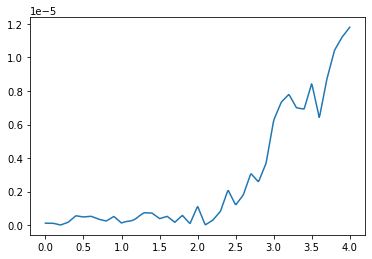

In [272]:
# Plot of weighted average of diffusion coefficient
plt.plot(df_diffusion['z'], df_diffusion['D'])

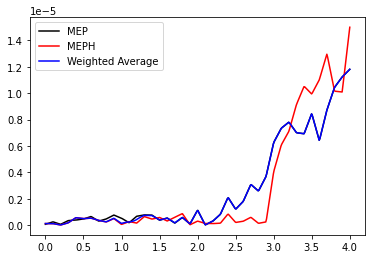

In [273]:
# For checking how identical the plots for diffusion coefficients are -
plt.plot(df_diffusion['z'], df_diffusion['D_P'],label = 'MEP', color = 'k')
plt.plot(df_diffusion['z'], df_diffusion['D_PH'], label = 'MEPH',  color = 'r')
plt.plot(df_diffusion['z'], df_diffusion['D'], label = 'Weighted Average', color='b')
plt.legend()
# Here the weighted average is almost identical to MEP

My first approach for the numerical integration will be to convert the distance in z which are in nm into cm for both weighted pmf as well as weighted diffusion coefficient.

In [274]:
# For pmf_dep it will be ---
pmf_mep_meph[0] = pmf_mep_meph[0] * 1 * 10 ** -7
pmf_mep_meph.head()
# Here, the only columns we need to worry about is at the index 0 and 2 which are the values for z-distance in cm,
# exp(Delta G/RT)

,0,1,2
0,0.000000e+00,18.906007,2058.108789
1,5.018508e-10,18.906007,2058.108789
2,1.505549e-09,18.795131,1968.050284
3,2.509248e-09,18.575250,1800.942423
4,3.512946e-09,18.311036,1618.801735


In [275]:
pmf_mep_meph.tail()

,0,1,2
396,3.969627e-07,0.049512,1.020182
397,3.979664e-07,0.042113,1.017140
398,3.989701e-07,0.067962,1.027806
399,3.999738e-07,0.067372,1.027561
400,4.000000e-07,0.067372,1.027561


In [276]:
np.exp(0.067372/2.478) #just checking values again

1.0275610224627898

In [277]:
df_diffusion['z'] = df_diffusion['z'] * 1 * 10 ** -7
df_diffusion.head()

,z,G_P,G_PH,D_P,D_PH,Q,D
0,0.000000e+00,42.28958,18.904136,6.340288e-08,1.194355e-07,0.000486,1.194310e-07
1,5.018508e-10,42.28958,18.904102,7.271173e-08,1.192251e-07,0.000486,1.192214e-07
2,1.505549e-09,42.11615,18.793019,9.132937e-08,1.188044e-07,0.000509,1.188022e-07
3,2.509248e-09,41.80657,18.572876,1.099470e-07,1.183837e-07,0.000556,1.183830e-07
4,3.512946e-09,41.34310,18.308211,1.285647e-07,1.179629e-07,0.000619,1.179639e-07


In [278]:
df_diffusion.tail()

,z,G_P,G_PH,D_P,D_PH,Q,D
396,3.969627e-07,0.039132,18.600395,0.000012,0.000014,0.984882,0.000012
397,3.979664e-07,0.031721,18.590689,0.000012,0.000014,0.987832,0.000012
398,3.989701e-07,0.057453,18.590804,0.000012,0.000014,0.977633,0.000012
399,3.999738e-07,0.056941,18.606724,0.000012,0.000015,0.977832,0.000012
400,4.000000e-07,0.056941,18.606724,0.000012,0.000015,0.977832,0.000012


<AxesSubplot:xlabel='z'>

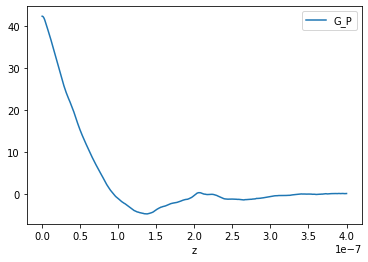

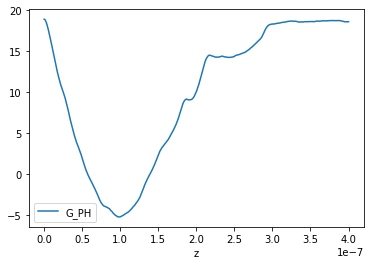

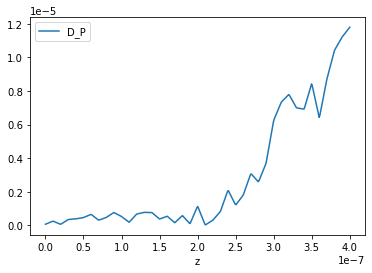

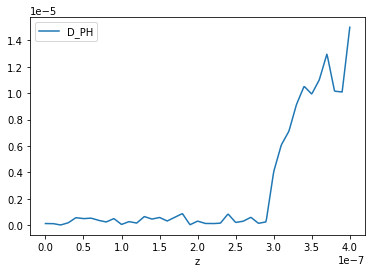

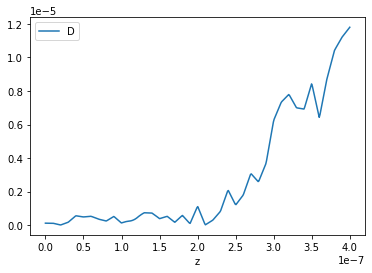

In [288]:
# Play with plots
df_diffusion.plot('z', 'G_P')
df_diffusion.plot('z', 'G_PH')
df_diffusion.plot('z', 'D_P')
df_diffusion.plot('z', 'D_PH')
df_diffusion.plot('z', 'D')

In [289]:
# Now, we can perform numerical integration with either composite trapezoidal rule, or the simpson's rule

$$\int_{0}^{4 \times 10 ^{-7}} \frac{\exp\left ( \frac{\Delta G(z)}{RT} \right )}{D(z)} dz$$

In [290]:
#trapz(values of the function to integrate, sample points(z) corresponding to the function values, optional (dz)
#- spacing between the sample points(z))

In [291]:
integrand = pmf_mep_meph[2]/df_diffusion['D']

In [292]:
integrand

0      1.723261e+10
1      1.726291e+10
2      1.656578e+10
3      1.521285e+10
4      1.372286e+10
           ...     
396    8.773780e+04
397    8.704015e+04
398    8.751647e+04
399    8.706383e+04
400    8.705262e+04
Length: 401, dtype: float64

In [293]:
#Let's check some values of the integrand. For the first value at z = 0,

In [295]:
pmf_mep_meph[1].to_numpy()[0] # This is the pmf

18.906007

In [298]:
df_diffusion['D'].to_numpy()[0]

1.1943103448549533e-07

In [300]:
#Delta G = 18.906007, RT = 2.478, D(z) = 1.1943103448549533e-07 cm^2/s
np.exp(18.906007/2.478)/1.1943103448549533e-07

17232612927.62796

In [301]:
integrand[0] # So it matches

17232612927.62796

In [304]:
trapz(integrand, df_diffusion['z']) # or

170.600012938281

In [305]:
trapz(integrand, pmf_mep_meph[0])

170.600012938281

In [308]:
# The permeability will be 1/integral
1/trapz(integrand, pmf_mep_meph[0]) # in cm/s

0.005861664268230602

In [307]:
1/170.600012938281

0.005861664268230602

The calculated value of permeability for monoester(MEP-MEPH) is $$5.86 \times 10^{-3}\;cm/s$$

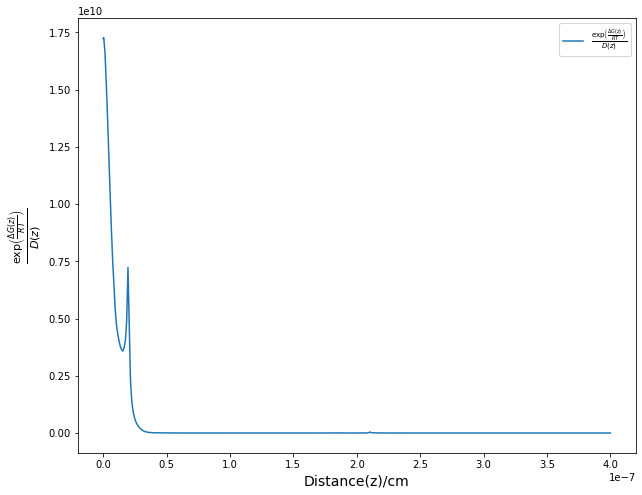

In [309]:
# Let's look at the plot of the integrand
plt.figure(figsize = (10,8))
plt.plot(pmf_mep_meph[0], integrand, label = r'$\frac{\exp\left ( \frac{\Delta G(z)}{RT} \right )}{D(z)}$')
plt.xlabel('Distance(z)/cm', fontsize = 14)
plt.ylabel(r'$\frac{\exp\left ( \frac{\Delta G(z)}{RT} \right )}{D(z)}$', fontsize = 16)
plt.legend()

#### Using Simpson's method

In [312]:
1/simps(integrand, pmf_mep_meph[0]) # Identical result

0.005875804439657055

In [313]:
integ = pd.DataFrame({'0': pmf_mep_meph[0], '1': integrand})

In [314]:
integ

,0,1
0,0.000000e+00,1.723261e+10
1,5.018508e-10,1.726291e+10
2,1.505549e-09,1.656578e+10
3,2.509248e-09,1.521285e+10
4,3.512946e-09,1.372286e+10
...,...,...
396,3.969627e-07,8.773780e+04
397,3.979664e-07,8.704015e+04
398,3.989701e-07,8.751647e+04
399,3.999738e-07,8.706383e+04


In [315]:
# You can also export the data to xmgrace and calculate the area by yourself
integ.to_csv('integrand.xvg', index = False, header = None, sep = ' ')

In [317]:
!xmgrace integrand.xvg # Gives us the same area as the value of our integral

#### My another approach for the numerical integration will be to convert diffusion coefficient (cm^2/s) into nm^2/s, integrate it over the distance in nm, and finally convert into cm/s

In [319]:
pmf_mep_meph.head()

,0,1,2
0,0.000000e+00,18.906007,2058.108789
1,5.018508e-10,18.906007,2058.108789
2,1.505549e-09,18.795131,1968.050284
3,2.509248e-09,18.575250,1800.942423
4,3.512946e-09,18.311036,1618.801735


In [321]:
df_diffusion.head()

,z,G_P,G_PH,D_P,D_PH,Q,D
0,0.000000e+00,42.28958,18.904136,6.340288e-08,1.194355e-07,0.000486,1.194310e-07
1,5.018508e-10,42.28958,18.904102,7.271173e-08,1.192251e-07,0.000486,1.192214e-07
2,1.505549e-09,42.11615,18.793019,9.132937e-08,1.188044e-07,0.000509,1.188022e-07
3,2.509248e-09,41.80657,18.572876,1.099470e-07,1.183837e-07,0.000556,1.183830e-07
4,3.512946e-09,41.34310,18.308211,1.285647e-07,1.179629e-07,0.000619,1.179639e-07


In [322]:
pmf_mep_meph[0] = pmf_mep_meph[0] * 1 * 10 ** 7
df_diffusion['z'] = df_diffusion['z'] * 1 * 10 ** 7

In [323]:
pmf_mep_meph.head()

,0,1,2
0,0.000000,18.906007,2058.108789
1,0.005019,18.906007,2058.108789
2,0.015055,18.795131,1968.050284
3,0.025092,18.575250,1800.942423
4,0.035129,18.311036,1618.801735


In [324]:
df_diffusion.head()

,z,G_P,G_PH,D_P,D_PH,Q,D
0,0.000000,42.28958,18.904136,6.340288e-08,1.194355e-07,0.000486,1.194310e-07
1,0.005019,42.28958,18.904102,7.271173e-08,1.192251e-07,0.000486,1.192214e-07
2,0.015055,42.11615,18.793019,9.132937e-08,1.188044e-07,0.000509,1.188022e-07
3,0.025092,41.80657,18.572876,1.099470e-07,1.183837e-07,0.000556,1.183830e-07
4,0.035129,41.34310,18.308211,1.285647e-07,1.179629e-07,0.000619,1.179639e-07


In [325]:
# Converting diffusion coefficient into nm^2/s and adding it into the last column
df_diffusion['D'] = df_diffusion['D'] * 1 * 10 ** 14

In [326]:
df_diffusion.head()

,z,G_P,G_PH,D_P,D_PH,Q,D
0,0.000000,42.28958,18.904136,6.340288e-08,1.194355e-07,0.000486,1.194310e+07
1,0.005019,42.28958,18.904102,7.271173e-08,1.192251e-07,0.000486,1.192214e+07
2,0.015055,42.11615,18.793019,9.132937e-08,1.188044e-07,0.000509,1.188022e+07
3,0.025092,41.80657,18.572876,1.099470e-07,1.183837e-07,0.000556,1.183830e+07
4,0.035129,41.34310,18.308211,1.285647e-07,1.179629e-07,0.000619,1.179639e+07


In [327]:
integrand = pmf_mep_meph[2]/df_diffusion['D']

In [328]:
trapz(integrand, pmf_mep_meph[0])

1.7060001293828098e-05

In [329]:
1/trapz(integrand, pmf_mep_meph[0]) # This is now in nm/s

58616.64268230602

In [331]:
# Converting into cm/s
1/trapz(integrand, pmf_mep_meph[0]) * 1 * 10 ** -7 # We got the same answer in both ways

0.005861664268230602